# Linear Regression

Linear regression using Gradient descent algorithm and normalization.

### Goal

Estimate house prices based on the area and the quantity of bedrooms.

### Variables

**X<sub>1</sub>**: Area (m2)

**X<sub>2</sub>**: # Bedrooms

**Y**: Price

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
from utils import load_data
from implementations import compute, compute_linear_cost, compute_gradient, compute_gradient_descent, mean_normalization

In [2]:
X_train, Y_train = load_data("samples/house-price.csv")
X_features = ["Area m2", "# Bedrooms"] 

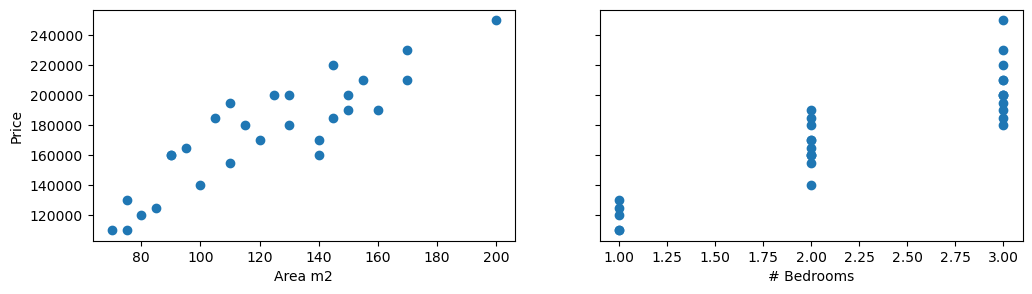

In [3]:
# Dataset plots

fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_train[:,i], Y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price")
plt.show()

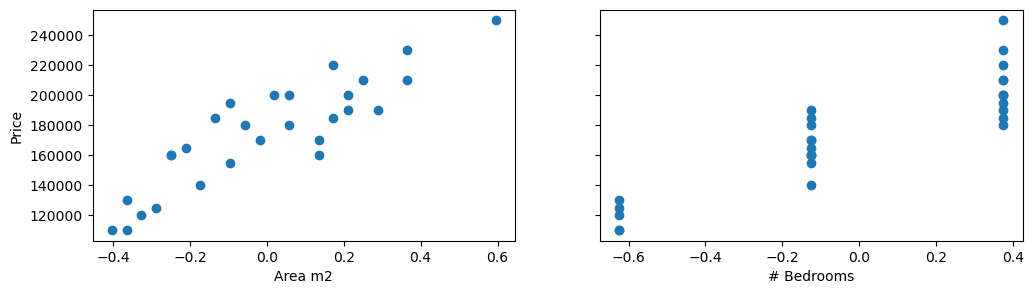

In [4]:
# Calculate normalized dataset and plot

X_normalized_train = mean_normalization(X_train)

fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_normalized_train[:,i], Y_train)
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price")
plt.show()

In [5]:
# Gradient descent 
# Using a large enough alpha and 1000 iterations

initial_w = np.zeros(X_normalized_train.shape[1])
initial_b = .0
alpha = 0.01
iterations = 10000

w, b, j_hist = compute_gradient_descent(X_normalized_train,
                                        Y_train,
                                        copy.deepcopy(initial_w),
                                        initial_b, 
                                        compute_linear_cost, 
                                        compute_gradient, 
                                        alpha,
                                        -1,
                                        iterations)

Iteration      1 | Cost 15622776185.05
Iteration   1000 | Cost 75200996.63
Iteration   2000 | Cost 57199101.82
Iteration   3000 | Cost 55105146.58
Iteration   4000 | Cost 54059176.33
Iteration   5000 | Cost 53413731.20
Iteration   6000 | Cost 53011053.37
Iteration   7000 | Cost 52759705.53
Iteration   8000 | Cost 52602812.87
Iteration   9000 | Cost 52504879.53
Iteration  10000 | Cost 52443748.95


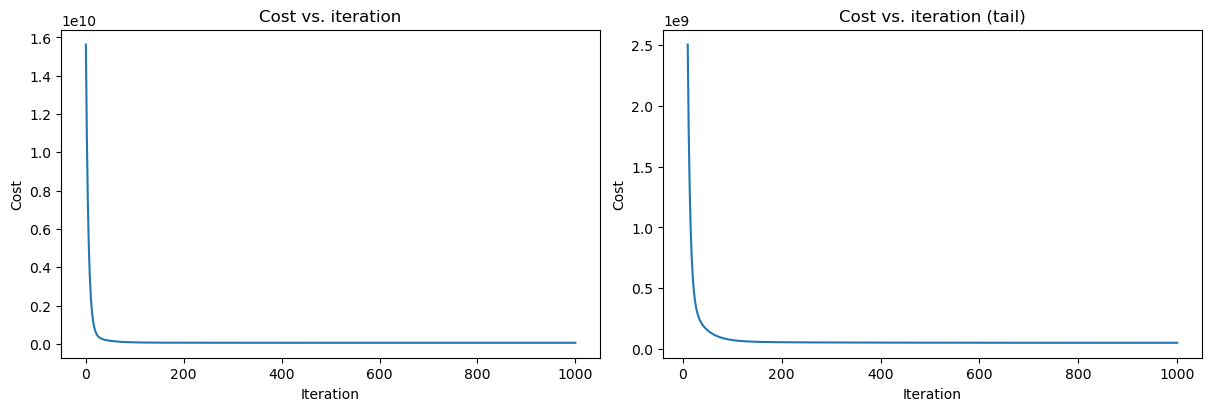

In [6]:
# Gradiant descent plot
# Mainly for debugging alpha and iterarions ideal values

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))

ax1.set_title("Cost vs. iteration")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iteration")
ax1.plot(j_hist)

ax2.set_title("Cost vs. iteration (tail)")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iteration")
ax2.plot(10 + np.arange(len(j_hist[10:])), j_hist[10:])

plt.show()

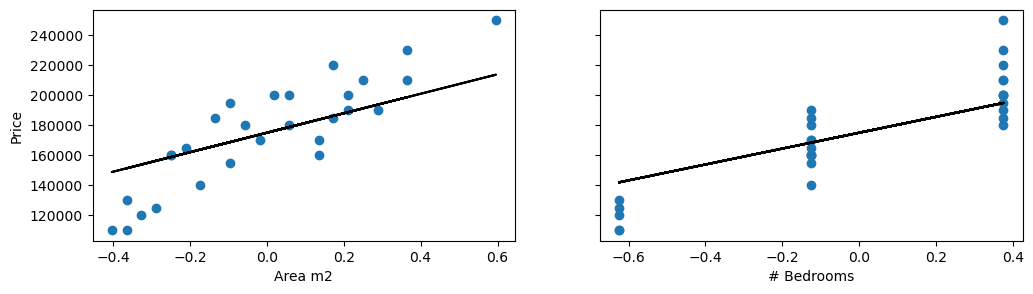

In [7]:
# Plot model result

fig, ax = plt.subplots(1, 2, figsize=(12, 3), sharey=True)

for i in range(len(ax)):
    ax[i].scatter(X_normalized_train[:,i], Y_train)
    ax[i].plot(X_normalized_train[:,i], X_normalized_train[:,i] * w[i] + b, color='black')
    ax[i].set_xlabel(X_features[i])

ax[0].set_ylabel("Price")
plt.show()